In [21]:
# importing libraries 
import tensorflow as tf 
from tensorflow import keras
from keras import layers
#dataset 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# scikit learn 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load the dataset 
df = sns.load_dataset('tips')
# intinlize label encoder here 
le = LabelEncoder()
# encoding categorical columns to numeric form 
for col in df.columns:
    df[col]= le.fit_transform(df[col])
# converting the tip column into binary 1 for if tip is above 2$ else 0
df['tip']= (df['tip']>2).astype(int)
# selecting and features and output 
x = df.drop(['tip'],axis=1)
y = df['tip']
# scale the data 
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
# spilting the data into training and testing data 
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)
# building the network 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu',input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(8,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# compile the model 
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# fit the model on the data 
model.fit(x_train,y_train,batch_size=2,epochs=5,verbose=1)
# evaluate the model 
y_pred=model.predict(x_test)
# evaluate the model performance
loss, accuracy =model.evaluate(x_test,y_test)
print(f'Test loss {loss}')
print(f'Accuracy {accuracy}')

Epoch 1/5
98/98 [==============================] - 1s 2ms/step - loss: 0.3118 - accuracy: 0.9744
Epoch 2/5
98/98 [==============================] - 0s 3ms/step - loss: 0.1286 - accuracy: 0.9744
Epoch 3/5
98/98 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9744
Epoch 4/5
98/98 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.9744
Epoch 5/5
2/2 [==============================] - 0s 6ms/step - loss: 0.0663 - accuracy: 0.9796
Test loss 0.06630895286798477
Accuracy 0.9795918464660645


In [22]:
df

,total_bill,tip,sex,smoker,day,time,size
0,102,0,0,0,2,0,1
1,21,1,1,0,2,0,2
2,147,1,1,0,2,0,2
3,163,1,1,0,2,0,1
4,171,1,0,0,2,0,3
...,...,...,...,...,...,...,...
239,193,1,1,0,1,0,2
240,185,1,0,1,1,0,1
241,156,1,1,1,1,0,1
242,113,1,1,0,1,0,1


Epoch 1/40
7/7 [==============================] - 2s 54ms/step - loss: 6.8026 - mae: 2.2376 - val_loss: 3.3304 - val_mae: 1.4840
Epoch 2/40
7/7 [==============================] - 0s 12ms/step - loss: 4.5989 - mae: 1.7149 - val_loss: 1.9939 - val_mae: 1.0471
Epoch 3/40
7/7 [==============================] - 0s 14ms/step - loss: 3.0748 - mae: 1.2846 - val_loss: 1.3153 - val_mae: 0.8867
Epoch 4/40
7/7 [==============================] - 0s 15ms/step - loss: 2.1651 - mae: 1.0609 - val_loss: 1.1545 - val_mae: 0.8953
Epoch 5/40
7/7 [==============================] - 0s 19ms/step - loss: 1.7060 - mae: 0.9473 - val_loss: 1.1949 - val_mae: 0.9294
Epoch 6/40
7/7 [==============================] - 0s 36ms/step - loss: 1.5186 - mae: 0.9135 - val_loss: 1.2107 - val_mae: 0.9351
Epoch 7/40
7/7 [==============================] - 0s 22ms/step - loss: 1.4106 - mae: 0.8862 - val_loss: 1.1735 - val_mae: 0.9167
Epoch 8/40
7/7 [==============================] - 0s 21ms/step - loss: 1.3319 - mae: 0.8587 - val

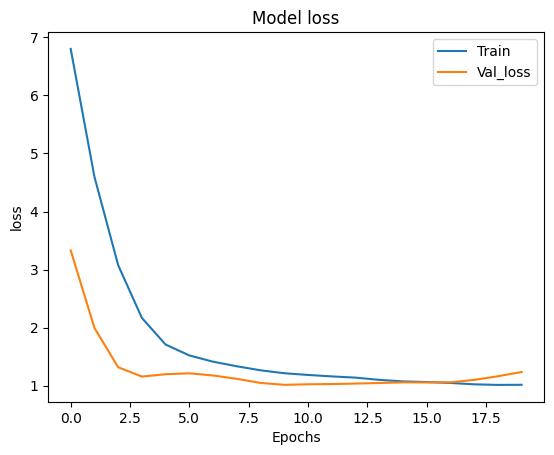

In [27]:
from tensorflow.keras.callbacks import EarlyStopping
df = sns.load_dataset('tips')
# encoding categorical variable 
df = pd.get_dummies(df,columns=['sex','day','time','smoker'])
# selecting feature and target data 
x = df.drop('tip',axis=1)
y = df['tip']
# scalling the features 
scaler = StandardScaler()
x = scaler.fit_transform(x)
# spliting the data into training and testig data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
# building the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation='relu',input_shape=[x_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])
# calling an earlystopping object 
earlystopping = EarlyStopping(patience=5)
history = model.fit(x_train,y_train,epochs=40,batch_size=32,
                    callbacks=earlystopping,
                    validation_data=(x_test,y_test),verbose=1)
# evaluate the model using mean squared error 
loss = model.evaluate(x_test,y_test,verbose=1)
# ploting the training and testing loss
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['Train','Val_loss'],loc='upper right')
plt.show()